<a href="https://colab.research.google.com/github/irahanjose/Aprendizaje-de-M-quina-con-Python/blob/main/clasificacion_multiclase_softmax_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clasificación Multiclase en Keras

## 1. Configuración Google Drive

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
ruta = '/gdrive/MyDrive/Colab Notebooks/01_2021-07-FundamentosDL/1.12/dataset.csv'

## 2. Lectura y visualización del set de datos

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
import tensorflow as tf
tf.random.set_seed(23)
np.random.seed(12)

In [ ]:
data = pd.read_csv(ruta)

In [ ]:
data.head(10)

,x1,x2,y
0,8,8,alto
1,8,4,alto
2,3,8,medio
3,1,4,bajo
4,4,1,bajo
5,2,6,medio
6,6,6,alto
7,2,2,bajo
8,1,1,bajo
9,4,7,medio


In [ ]:
data.shape

(13, 3)

In [ ]:
X = data[['x1','x2']].to_numpy()
X.shape

(13, 2)

In [ ]:
y_str = data['y'].to_numpy()
print(y_str.shape)
print(y_str)

(13,)
['alto' 'alto' 'medio' 'bajo' 'bajo' 'medio' 'alto' 'bajo' 'bajo' 'medio'
 'medio' 'alto' 'alto']


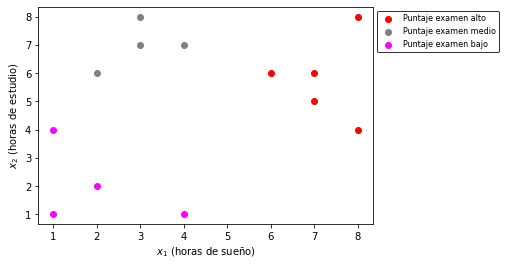

In [ ]:
idx_a = np.where(y_str=='alto') # Puntaje examen alto
idx_m = np.where(y_str=='medio') # Puntaje examen medio
idx_b = np.where(y_str=='bajo') # Puntaje examen bajo

plt.scatter(X[idx_a,0],X[idx_a,1],color='red',label='Puntaje examen alto')
plt.scatter(X[idx_m,0],X[idx_m,1],color='gray',label='Puntaje examen medio')
plt.scatter(X[idx_b,0],X[idx_b,1],color='magenta',label='Puntaje examen bajo')
plt.xlabel('$x_1$ (horas de sueño)')
plt.ylabel('$x_2$ (horas de estudio)')
plt.legend(bbox_to_anchor=(1.0,1.0),fontsize=8,edgecolor='black')

## 3. Pre-procesamiento

In [ ]:
# Convertir las etiquetas 'alto', 'medio' y 'bajo' a one-hot
# Hay tres formas de hacerlo: manual (no recomendado), con Scikit Learn
# (el más recomendado) o con Keras

# 1. Manual: texto -> entero -> one-hot

# Texto a entero
categorias = np.unique(y_str)
print(categorias)
text_to_int = dict((t, i) for i, t in enumerate(categorias))
print(text_to_int)

y_int = [text_to_int[texto] for texto in y_str]

for i, texto in enumerate(y_str):
  print(texto + '->   ' + str(y_int[i]))

['alto' 'bajo' 'medio']
{'alto': 0, 'bajo': 1, 'medio': 2}
alto->   0
alto->   0
medio->   2
bajo->   1
bajo->   1
medio->   2
alto->   0
bajo->   1
bajo->   1
medio->   2
medio->   2
alto->   0
alto->   0


In [ ]:
# Entero a one-hot
n = len(categorias)  # Número de categorías: 3 (alto, medio, bajo)
m = len(y_str)        # Cantidad de datos
y = np.zeros((m,n))

for row, value in enumerate(y_int):
  y[row,value] = 1

for i, texto in enumerate(y_str):
  print(texto + '->   ' + str(y_int[i]) + '->   ' + str(y[i,:]))


alto->   0->   [1. 0. 0.]
alto->   0->   [1. 0. 0.]
medio->   2->   [0. 0. 1.]
bajo->   1->   [0. 1. 0.]
bajo->   1->   [0. 1. 0.]
medio->   2->   [0. 0. 1.]
alto->   0->   [1. 0. 0.]
bajo->   1->   [0. 1. 0.]
bajo->   1->   [0. 1. 0.]
medio->   2->   [0. 0. 1.]
medio->   2->   [0. 0. 1.]
alto->   0->   [1. 0. 0.]
alto->   0->   [1. 0. 0.]


In [ ]:
# 2. Con Scikit Learn: texto -> entero -> onehot
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# Codificar a entero
int_encoder = LabelEncoder()
y_int = int_encoder.fit_transform(y_str)

# Entero a one-hot
onehot_encoder = OneHotEncoder(sparse=False)    # No se requiere sparse porque son pocos datos
y_int = y_int.reshape(len(y_int), 1)
y = onehot_encoder.fit_transform(y_int)

for i, texto in enumerate(y_str):
  print(texto + '->   ' + str(y_int[i]) + '->   ' + str(y[i,:]))

alto->   [0]->   [1. 0. 0.]
alto->   [0]->   [1. 0. 0.]
medio->   [2]->   [0. 0. 1.]
bajo->   [1]->   [0. 1. 0.]
bajo->   [1]->   [0. 1. 0.]
medio->   [2]->   [0. 0. 1.]
alto->   [0]->   [1. 0. 0.]
bajo->   [1]->   [0. 1. 0.]
bajo->   [1]->   [0. 1. 0.]
medio->   [2]->   [0. 0. 1.]
medio->   [2]->   [0. 0. 1.]
alto->   [0]->   [1. 0. 0.]
alto->   [0]->   [1. 0. 0.]


In [ ]:
# 3. Con Keras: texto -> entero -> one-hot
# texto -> entero: idéntico a scikit-learn
# entero -> one-hot: usando "to_categorical" de Keras

# Codificar a entero con Scikit-learn
int_encoder = LabelEncoder()
y_int = int_encoder.fit_transform(y_str)

# entero -> one-hot con Keras
from tensorflow.keras.utils import to_categorical
y = to_categorical(y_int)

for i, texto in enumerate(y_str):
  print(texto + '->   ' + str(y_int[i]) + '->   ' + str(y[i,:]))

alto->   0->   [1. 0. 0.]
alto->   0->   [1. 0. 0.]
medio->   2->   [0. 0. 1.]
bajo->   1->   [0. 1. 0.]
bajo->   1->   [0. 1. 0.]
medio->   2->   [0. 0. 1.]
alto->   0->   [1. 0. 0.]
bajo->   1->   [0. 1. 0.]
bajo->   1->   [0. 1. 0.]
medio->   2->   [0. 0. 1.]
medio->   2->   [0. 0. 1.]
alto->   0->   [1. 0. 0.]
alto->   0->   [1. 0. 0.]


## 4. Crear el modelo en Keras

In [ ]:
# Contenedor vacío
modelo = Sequential()

In [ ]:
# Parámetros de entrada del modelo
dim_entrada = X.shape[1]    # Cada ejemplo de entrenamiento tendrá 2 características (x1,x2)
dim_salida = 3              # 3 posibles categorías

# Comenzar a llenar el modelo ('add')
modelo.add(Dense(dim_salida, input_dim = dim_entrada, activation='softmax'))
# ¡Y listo, ya tenemos la estructura del clasificador!

In [ ]:
# Información del modelo
modelo.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 3)                 9         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


## 5. Optimizador (Gradiente Descendente Estocástico) y pérdida

In [ ]:
# Optimización: se usará gradiente descendente (SGD) con lr=0.2, función de error entropía
# cruzada (binary_crossentropy), métrica para el desempeño: accuracy (precisión)

optimizador = SGD(learning_rate=0.4)
modelo.compile(loss='categorical_crossentropy', optimizer=optimizador, metrics=['accuracy'])

## 6. Entrenamiento y predicción

In [ ]:
n_epochs = 130
s_minibatches = X.shape[0]  # Cada batch será del mismo tamaño del set de entrenamiento
historia = modelo.fit(X,y,epochs=n_epochs,batch_size=s_minibatches,verbose=1)

Epoch 1/130
1/1 [==============================] - 1s 607ms/step - loss: 3.4809 - accuracy: 0.3077
Epoch 2/130
1/1 [==============================] - 0s 4ms/step - loss: 6.4597 - accuracy: 0.3846
Epoch 3/130
1/1 [==============================] - 0s 13ms/step - loss: 2.1396 - accuracy: 0.3846
Epoch 4/130
1/1 [==============================] - 0s 6ms/step - loss: 2.1556 - accuracy: 0.6923
Epoch 5/130
1/1 [==============================] - 0s 5ms/step - loss: 1.7061 - accuracy: 0.6923
Epoch 6/130
1/1 [==============================] - 0s 7ms/step - loss: 2.0461 - accuracy: 0.3846
Epoch 7/130
1/1 [==============================] - 0s 7ms/step - loss: 4.1697 - accuracy: 0.3077
Epoch 8/130
1/1 [==============================] - 0s 7ms/step - loss: 3.5757 - accuracy: 0.3846
Epoch 9/130
1/1 [==============================] - 0s 5ms/step - loss: 1.3797 - accuracy: 0.3846
Epoch 10/130
1/1 [==============================] - 0s 6ms/step - loss: 1.9927 - accuracy: 0.6923
Epoch 11/130
1/1 [========

### 6.1 Comportamiento del error

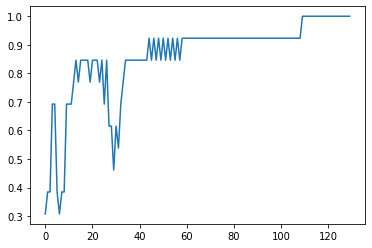

In [ ]:
plt.plot(historia.history['accuracy'])

### 6.2 Predicción

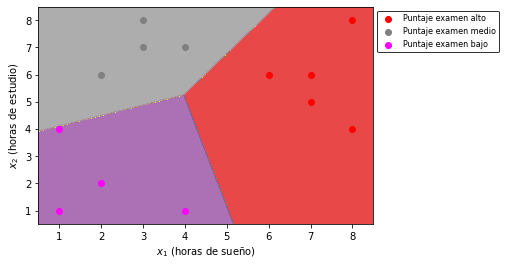

In [ ]:
def dibujar_frontera(X,Y,modelo):
    # Valor mínimo y máximo y rellenado con ceros
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01

    # Grilla de puntos
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predecir categorías para cada punto en la grilla 
    probabilidades = modelo.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = np.argmax(probabilidades,axis=1)   # Escoger la prob. más alta para cada predicción
    Z = Z.reshape(xx.shape)

    fig = plt.figure()
    plt.contourf(xx, yy, Z, cmap=plt.cm.Set1, alpha=0.8)

    idx_a = np.where(y_str=='alto') # Puntaje examen alto
    idx_m = np.where(y_str=='medio') # Puntaje examen medio
    idx_b = np.where(y_str=='bajo') # Puntaje examen bajo

    plt.scatter(X[idx_a,0],X[idx_a,1],color='red',label='Puntaje examen alto')
    plt.scatter(X[idx_m,0],X[idx_m,1],color='gray',label='Puntaje examen medio')
    plt.scatter(X[idx_b,0],X[idx_b,1],color='magenta',label='Puntaje examen bajo')
    plt.xlabel('$x_1$ (horas de sueño)')
    plt.ylabel('$x_2$ (horas de estudio)')
    plt.legend(bbox_to_anchor=(1.0,1.0),fontsize=8,edgecolor='black')

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

dibujar_frontera(X,y_str,modelo)